In [1]:
# Numerical libraries
import numpy as np   
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import statsmodels.formula.api as smf # for ols library

In [2]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv")  

In [3]:
mpg_df.shape

(398, 10)

In [4]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [5]:
# Check top few records to get a feel of the data structure
mpg_df.shape

(398, 10)

In [6]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('car_name', axis=1)

In [7]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [8]:
# Note:  HP column is missing the describe output. That indicates something is not right with that column

In [9]:
#Check if the hp column contains anything other than digits 
# run the "isdigit() check on 'hp' column of the mpg_df dataframe. Result will be True or False for every row
# capture the result in temp dataframe and dow a frequency count using value_counts()
# There are six records with non digit values in 'hp' column
temp = pd.DataFrame(mpg_df.hp.str.isdigit())
temp[temp['hp'] == False]
mpg_df = mpg_df.replace('?', np.nan)
mpg_df[mpg_df.isnull().any(axis=1)]
mpg_df = mpg_df.fillna(mpg_df.median())

In [10]:
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [11]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)

In [12]:
#Let us see if we can get those records with nan
mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type


In [13]:
#of the 398 rows 6 have NAN in the hp column. We will drop those 6 rows. Not a good idea under all situations
#note: HP is missing becauses of the non-numeric values in the column. 
#mpg_df = mpg_df.dropna()

In [14]:
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
mpg_df = mpg_df.fillna(mpg_df.median())

In [15]:
mpg_df['hp'].dtype

dtype('O')

In [16]:
# The "hp" column was treated as an object when data was loaded into the dataframe as it contained "?"

mpg_df['hp']=mpg_df['hp'].astype('float64')
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [17]:
#let us look at each attribute and understand it's distribution
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


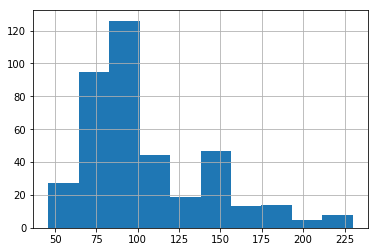

In [18]:
# Study the distribution of the data in each column. Columns which do not have random distributions may not be good 
# for model as random processes cannot be modeled
mpg_df.hp.hist()

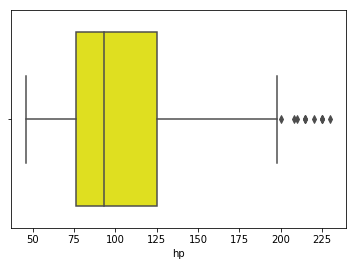

In [19]:
# Let us visually inspect the central values and the spread
sns.boxplot(mpg_df.hp, color = "yellow", orient = "h")

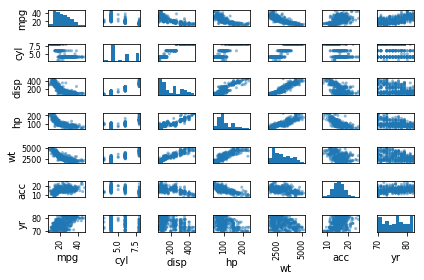

In [20]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:,0:7]

axes = pd.plotting.scatter_matrix(mpg_df_attr)
plt.tight_layout()
plt.savefig('mpg_pairpanel.png')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


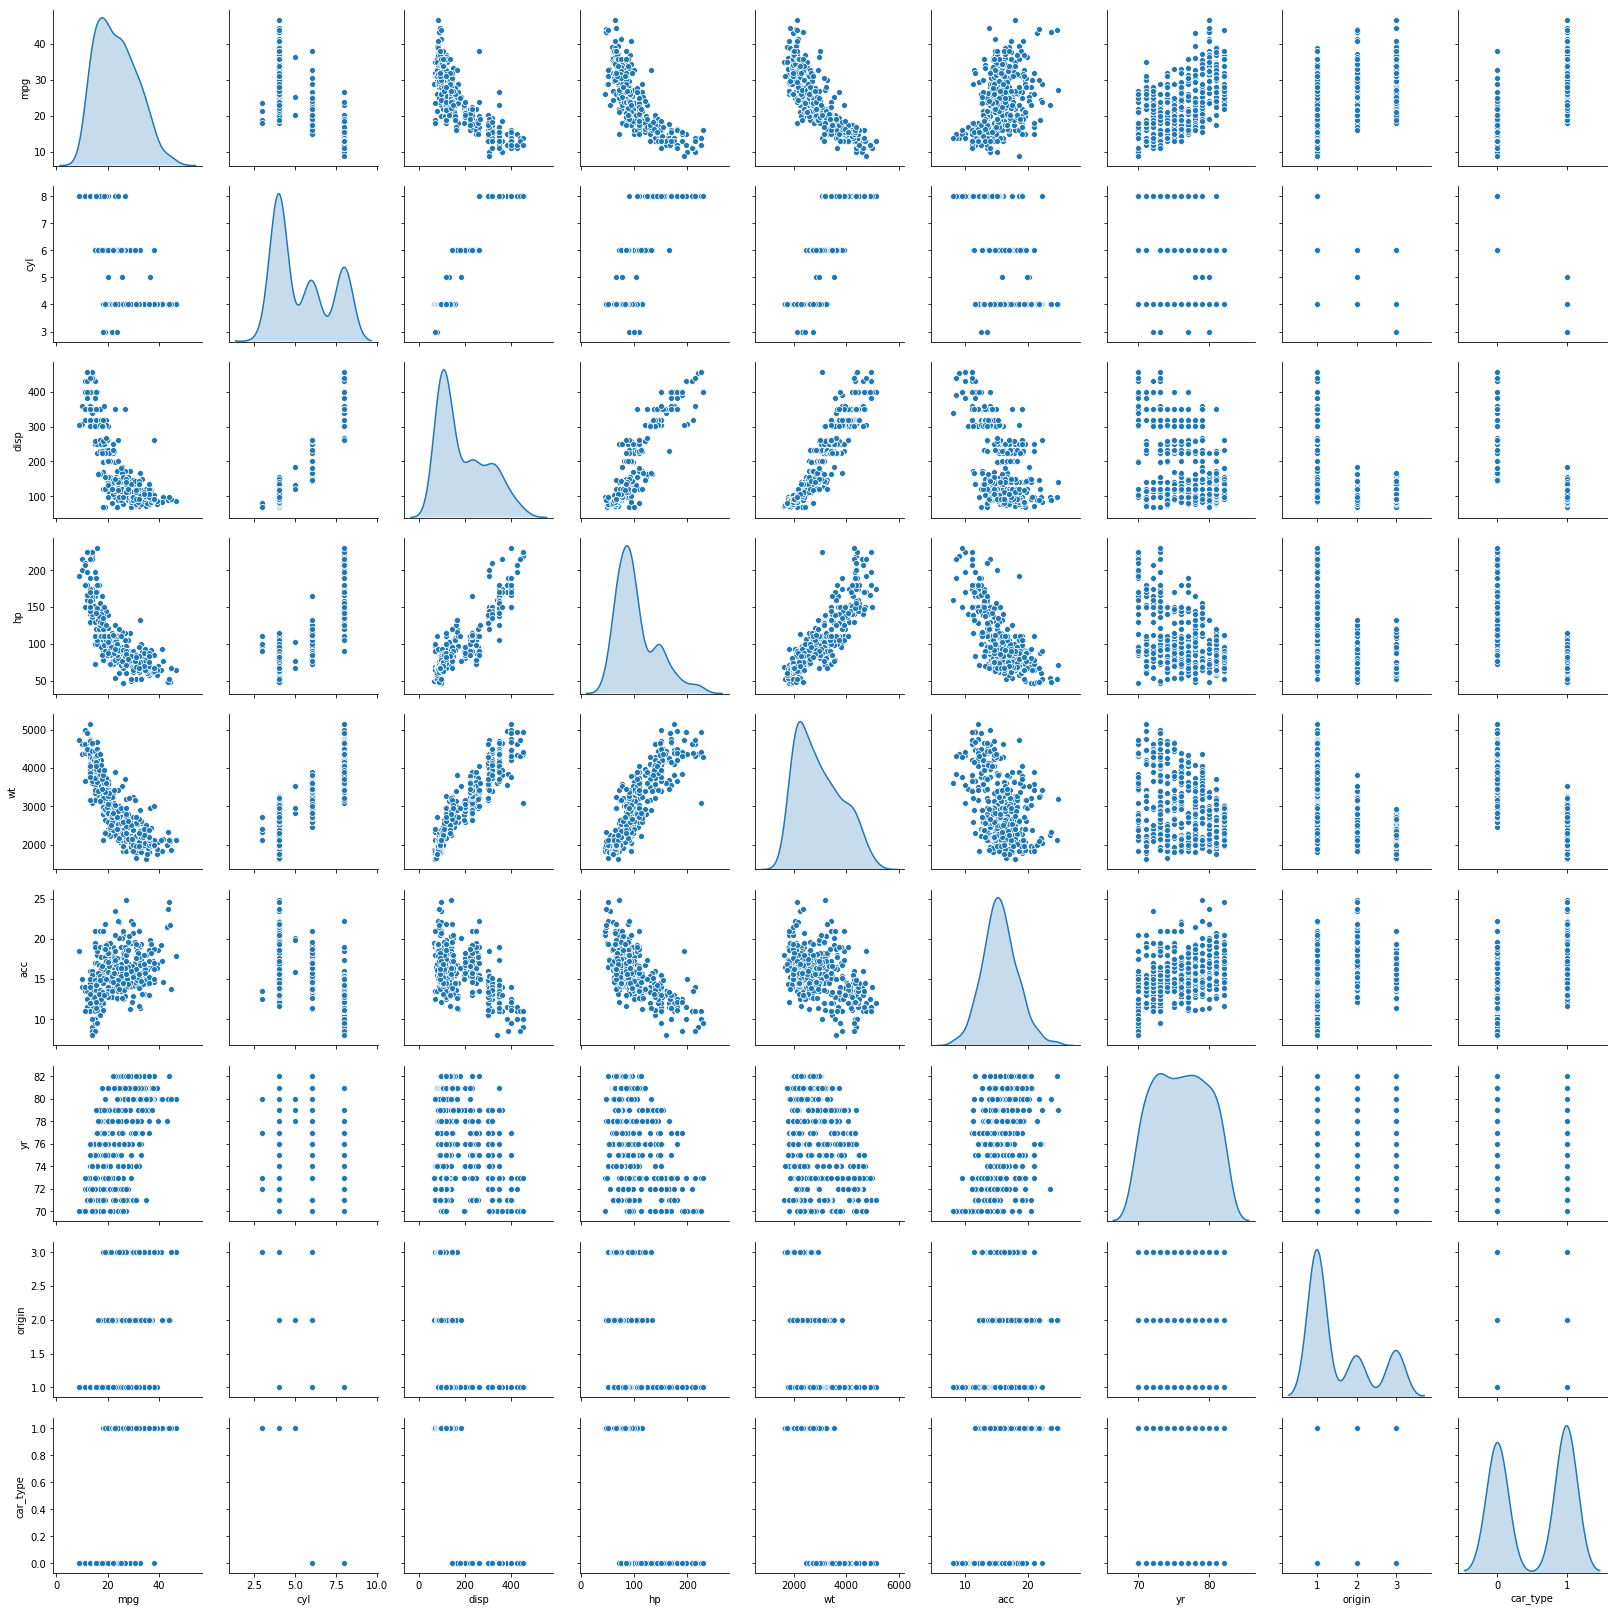

In [21]:
sns.pairplot(mpg_df,diag_kind='kde')

In [22]:
mpg_df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450,0.759207
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543,-0.912577
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409,-0.855141
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096,-0.701399
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024,-0.815445
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873,0.385187
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662,0.305194
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000,0.572691
car_type,0.759207,-0.912577,-0.855141,-0.701399,-0.815445,0.385187,0.305194,0.572691,1.000000


In [23]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop(['mpg','yr','acc','origin'], axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df['mpg']


In [24]:
type(y)

pandas.core.series.Series

In [25]:
X.head()

,cyl,disp,hp,wt,car_type
0,8,307.0,130.0,3504,0
1,8,350.0,165.0,3693,0
2,8,318.0,150.0,3436,0
3,8,304.0,150.0,3433,0
4,8,302.0,140.0,3449,0


In [26]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [27]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [28]:
X_train.head()

,cyl,disp,hp,wt,car_type
112,4,122.0,85.0,2310,1
283,6,232.0,90.0,3265,0
379,4,98.0,70.0,2125,1
306,6,173.0,115.0,2595,0
343,4,79.0,58.0,1755,1


In [29]:
X_test.shape

(120, 5)

In [30]:
y_train.shape

(278,)

In [31]:
y_test.shape

(120,)

In [32]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
y_pred=regression_model.predict(X_test)

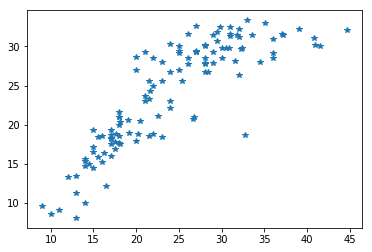

In [34]:
plt.plot(y_test,y_pred,'*')

In [35]:
np.corrcoef(y_test,y_pred)

array([[1.        , 0.85616894],
       [0.85616894, 1.        ]])

In [36]:
0.85616894*0.85616894

0.7330252538207236

In [37]:
1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))

0.7323729278538389

In [38]:
regression_model.score(X_test,y_test)

0.7323729278538389

In [39]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cyl is 1.6666141622801636
The coefficient for disp is 0.0011399481576859437
The coefficient for hp is -0.07465318292083427
The coefficient for wt is -0.004427353933737501
The coefficient for car_type is 7.211851063494734


In [40]:
X_train.columns

Index(['cyl', 'disp', 'hp', 'wt', 'car_type'], dtype='object')

In [41]:
regression_model.coef_[2]

-0.07465318292083427

In [42]:
regression_model.intercept_

31.271962945597416

In [43]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 31.271962945597416


In [44]:
# Model score - R2 or coeff of determinant


regression_model.score(X_test, y_test)

0.7323729278538389

In [45]:
# So the model explains 73.2% of the variability in Y using X

In [46]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

rmse = np.sqrt(np.mean((regression_model.predict(X_test)-y_test)**2))
rmse

3.9755811284715383

In [47]:
y_pred=regression_model.predict(X_test)

In [48]:
y_pred

array([ 8.09249823, 29.22354683, 30.73316849, 25.62589876, 28.01273174,
        8.53258485,  9.05412118, 15.21878934, 14.52169511, 17.76049899,
       25.64864086, 28.49747676, 33.35028693, 20.60109595, 31.54766754,
       27.94307129, 18.87313301, 28.09665129, 32.97127256, 18.5570142 ,
       29.75857543, 18.96416169, 29.39392227, 27.76765891, 11.29899166,
       18.24660755, 26.95094833, 21.01399617, 29.15449984, 18.76669462,
       32.66188754, 29.64643968, 23.05607792, 29.74199225,  9.96526894,
       31.41024005, 18.58309639, 32.52905156,  9.59311737, 31.05299256,
       17.89854875, 21.15894254, 21.61211863, 28.51524245, 29.24147302,
       31.45145442, 18.45186225, 12.17447494, 32.06163791, 27.74483579,
       30.24575016, 23.04092585, 26.77694998, 26.74716253, 28.01121374,
       13.50066734, 30.32101518, 20.3826788 , 14.99641741, 28.56754763,
       31.60522314, 27.85422761, 30.97946889, 20.67338049, 16.025454  ,
       30.14289918, 23.70055238, 18.72533912, 13.3310597 , 31.65

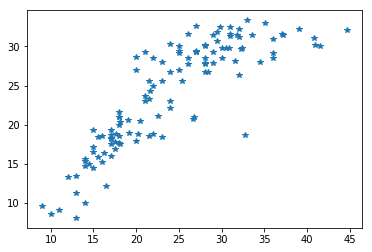

In [49]:
plt.plot(y_test,y_pred,'*')

In [50]:
np.corrcoef(y_test,y_pred)

array([[1.        , 0.85616894],
       [0.85616894, 1.        ]])

In [51]:
0.85616894**2

0.7330252538207236

In [52]:
# so there is avg of 4.0 (roundoff) mpg difference from real mpg on an avg

In [53]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

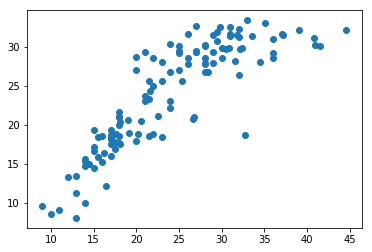

In [54]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

In [55]:
type(y_test)

pandas.core.series.Series

In [56]:
len(y_test)

120

In [57]:
len(y_pred)

120

In [58]:
np.corrcoef(y_test,y_pred)

array([[1.        , 0.85616894],
       [0.85616894, 1.        ]])

In [59]:
0.86056386*0.86056386

0.7405701571380995

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


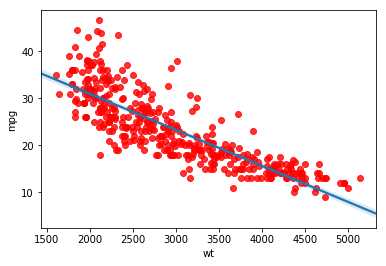

In [60]:
sns.regplot(mpg_df.wt, mpg_df.mpg, order=1,scatter_kws={'color':'r'})

In [61]:
model=LinearRegression()
x=X[['wt']]
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
ypred=model.predict(x)

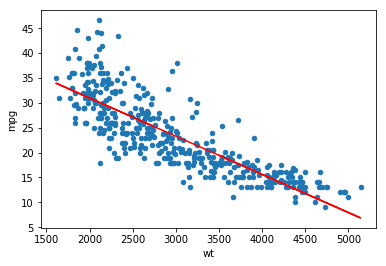

In [63]:
mpg_df.plot.scatter(x='wt',y='mpg')
plt.plot(x,ypred,c='red')

In [64]:
regression_model.coef_[2]

-0.07465318292083427

In [65]:
regression_model.intercept_

31.271962945597416

In [66]:
mpg=31.27+1.667*6+0.00113*198-0.0746*95-0.0044*2833

In [67]:
mpg

21.94353999999999

In [68]:
np.sqrt(np.mean((y_test-y_pred)**2))

3.9755811284715383

In [69]:
new_df=pd.concat([X_train,y_train],axis=1)
new_df.head()

,cyl,disp,hp,wt,car_type,mpg
112,4,122.0,85.0,2310,1,19.0
283,6,232.0,90.0,3265,0,20.2
379,4,98.0,70.0,2125,1,36.0
306,6,173.0,115.0,2595,0,28.8
343,4,79.0,58.0,1755,1,39.1


In [70]:
## implementation using ols
model2 = smf.ols('mpg~cyl+disp+hp+wt+car_type',new_df).fit()

In [71]:
model2.params

Intercept    31.271963
cyl           1.666614
disp          0.001140
hp           -0.074653
wt           -0.004427
car_type      7.211851
dtype: float64

In [74]:
y2_pred = []

In [78]:
## statistical implementation of regression formula: Y=B0 + B1_x1 + B2_x2...... + Bn_xn
## using ilooc because applyinh the equation on test data.
for i in np.arange(120):
    y2_pred.append(model2.params[0]
                   +model2.params[1]*X_test['cyl'].iloc[i]
                   +model2.params[2]*X_test['disp'].iloc[i]+model2.params[3]*X_test['hp'].iloc[i]
                   +model2.params[4]*X_test['wt'].iloc[i]
                   +model2.params[5]*X_test['car_type'].iloc[i])

In [79]:
print(y2_pred)

[8.092498228996178, 29.223546826141828, 30.73316849052075, 25.62589875804151, 28.01273174461338, 8.532584848429764, 9.054121180948666, 15.218789337499793, 14.521695109715772, 17.760498990653996, 25.648640862354075, 28.497476755695814, 33.35028693470002, 20.601095947757116, 31.547667535048273, 27.943071287165424, 18.873133012192213, 28.096651285596476, 32.97127256035806, 18.557014203537168, 29.75857543252738, 18.96416168536257, 29.393922271626998, 27.767658910329637, 11.298991656969378, 18.246607546674525, 26.950948330500434, 21.013996172650643, 29.15449984322956, 18.76669461802277, 32.66188753978451, 29.64643968026595, 23.0560779232472, 29.741992246799132, 9.965268942966748, 31.41024004603911, 18.58309639283133, 32.52905156303842, 9.593117365610755, 31.052992561576787, 17.898548750600806, 21.158942543407925, 21.612118627847078, 28.515242454876464, 29.241473016274245, 31.451454415613078, 18.4518622478094, 12.174474943510486, 32.06163790745272, 27.744835792039982, 30.24575016415074, 23.0

In [82]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     150.2
Date:                Sat, 04 May 2019   Prob (F-statistic):           4.47e-76
Time:                        16:57:14   Log-Likelihood:                -783.12
No. Observations:                 278   AIC:                             1578.
Df Residuals:                     272   BIC:                             1600.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.2720      3.099     10.090      0.000      25.170      37.374
cyl            1.6666      0.607      2.745      0.006       0.471       2.862
disp           0.0011      0.011      0.104      0.917      -0.020       0.023
hp            -0.0747      0.016     -4.624      0.000      -0.106      -0.043
wt            -0.0044      0.001     -5.045      0.000      -0.006      -0.003
car_type       7.2119      1.268      5.685      0.000       4.715       9.709
==============================================================================
Omnibus:                       30.869   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.912
Skew:                           0.692   Prob(JB):                     6.51e-11
Kurtosis:                       4.460   Cond. No.                     4.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""